<a href="https://colab.research.google.com/github/gabrielaaguiv5/MLTesting/blob/main/MLModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modelo de Clasificación**
# Objetivo:
Desarrollar un modelo de clasificación múltiple que permite clasificar y predecir correctamente la letra escrita (manual) con la letra del alfabeto correcta.


In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Guardar figuras de matplotlib en una carpeta específica (images/classification).

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from torchvision import datasets, transforms
import torch
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score,
                             precision_recall_curve, roc_curve, roc_auc_score)
import matplotlib.pyplot as plt

# Define transformation
transform = transforms.Compose([transforms.ToTensor()])

cargar imágenes, transformarlas en tensores (datos numéricos) y preparar el modelo de clasificación

In [ ]:
# Load EMNIST letters dataset
emnist = datasets.EMNIST(root="./data", split="letters", train=True, download=True, transform=transform)
emnist

100%|██████████| 562M/562M [00:10<00:00, 51.9MB/s]


Dataset EMNIST
    Number of datapoints: 124800
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

carga el dataset EMNIST Letters, que contiene imágenes de letras manuscritas (de la A a la Z).                                                   preparando datos reales de letras escritas a mano para entrenar  modelo de clasificación.

In [ ]:
emnist[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0784, 0.4471, 0.4902, 0.3216, 0.1451, 0.1451,
           0.1529, 0.4510, 0.6157, 0.3686, 0.0824, 0.0392, 0.1255, 0.1451,
           0.1451, 0.1451, 0.1451, 0.1451, 

Se toma el conjunto completo de imágenes del dataset

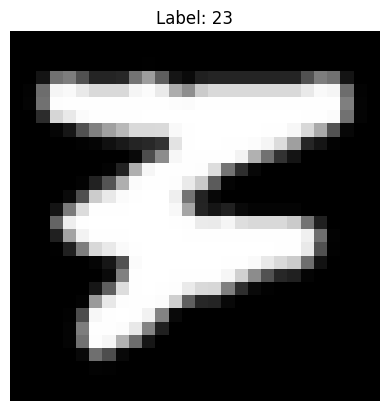

In [ ]:
import matplotlib.pyplot as plt

image, label = emnist[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

 se visualiza la letra manuscrita en el dataset, junto con el número que la representa.

x <- Input = Datos de las fotografías


*   torch.stack para "aplanar" las dimensiones de las imágenes a el array de numpy 28x28
*   emnist[i] genera una tupla: (image_tensor, label) - tensor de 3 dimensiones y el label que es la versión numérica de la letra


y <- Target = Datos de las fotografías


*   toma todos los labels y los guarda en un array NumPy que es el formato que acepta SGDClassifier

In [ ]:
x = torch.stack([emnist[i][0] for i in range(len(emnist))]).squeeze().view(-1, 28*28).numpy() # SGDClassifier only takes numpy arrays. In order you have to transform images to tensors to array.
# len(emnist) asegura que se tomen todas las imagenes que tienen formato tensor
# Cada tensor es [1, 28, 28] - 1 porque es en blanco y negro
# .stack convierte todas las imagenes en un gran tensor de [N, 1, 28, 28] - N es el número de imágenes
# .squeeze es lo que remueve la dimension 1 que no es necesaria
# .view convierte el 28x28 pixeles en un vector de 784 - Forma final: [N, 784]

y = np.array([emnist[i][1] for i in range(len(emnist))])

Se toma todo el conjunto de imágenes del dataset, donde cada imagen tiene un tamaño de 28x28 píxeles. Estas imágenes se transforman en vectores de 784 valores numéricos (porque 28 × 28 = 784), lo que permite representarlas en una sola dimensión. Además, se extrae la letra correspondiente a cada imagen y se guarda en una estructura de datos de NumPy.
Todo esto se hace con el propósito de convertir las imágenes y sus etiquetas (letras) en datos numéricos, dejándolos listos para entrenar un modelo de clasificación

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

se visualiza que x ya contiene todas las imágenes del dataset en forma de vectores numéricos. donde Cada columna representa el valor de un píxel (de un total de 784, que vienen de 28 × 28).

In [ ]:
y

array([23,  7, 16, ..., 13, 15, 19])

las letras que hay en cada imagen

In [ ]:
print(x.shape) #Array dimensions
print(x.ndim) #Number of array dimensions
print(x.size) #Number of array elements
print(x.dtype)  #Data type of array elements

(124800, 784)
2
97843200
float32


(124800, 784) → Hay un total de 124.800 imágenes donde cada una fue convertida en un vector de 784 números, porque originalmente cada imagen tenía un tamaño de 28 x 28 píxeles.

2 → Esto indica que los datos es de dos dimensiones: una fila por imagen y una columna por cada valor del vector.

97843200 → Es la cantidad total de números, resultado de multiplicar 124.800 imágenes por 784 valores cada una.

float32 → Significa que todos esos números están guardados en formato decimal de 32 bits

In [ ]:
print(y.shape) #Array dimensions
print(y.ndim) #Number of array dimensions
print(y.size) #Number of array elements
print(y.dtype)  #Data type of array elements

(124800,)
1
124800
int64


(124800,) → vector de una sola dimensión con 124.800 etiquetas, una por cada imagen.

1 → Tiene una única dimensión

124800 → Es el total de elementos, que coincide con la cantidad de imágenes.


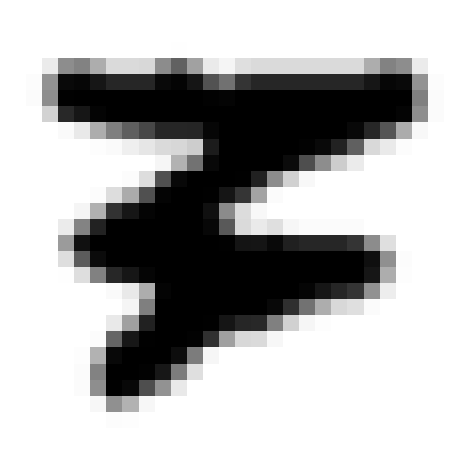

In [ ]:
def plot_letter(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

letter = x[0]
plot_letter(letter)
save_fig("Letra_1")  # extra code
plt.show()

Se toma una imagen que ya estaba representada como un vector de 784 números y se transforma nuevamente a su forma original de 28×28 píxeles.

In [ ]:
print(y[0])  # Esto te dirá el número de la letra

23


indica que la imagen que se encuentra en la etiqueta 23 es una w
ejemplo :
1 = A  
2 = B  
...  
23 = W  
24 = X  
25 = Y  
26 = Z

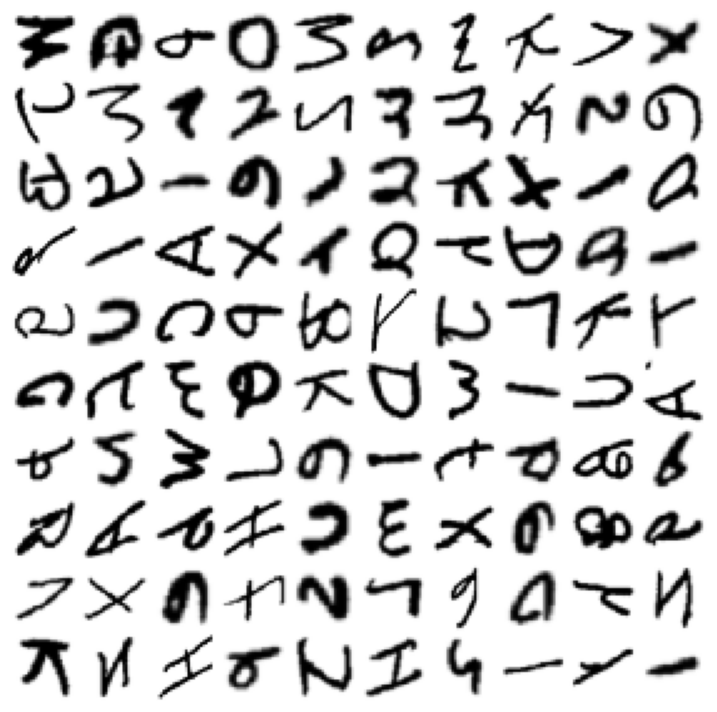

In [ ]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(x[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_letter(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("Varias_Letras", tight_layout=False)
plt.show()

se visualiza las primeras 100 letras escritas a mano del dataset en forma de cuadrícula.

## Asignando clasificación binaria

In [ ]:
y_bin = (y == 1).astype(np.uint8) # A mayúscula

Compara todas las etiquetas (y) y devuelve True si la etiqueta es 1, lo que en EMNIST representa la letra "A" mayúscula.

si cada imagen es una letra A o no. Pone un 1 si es una "A", y un 0 si no lo es.

## Asignando x y de entrenamiento y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y_bin, test_size=0.2, random_state=42, stratify=y_bin
) # 20% de los datos se usarán para prueba (test), y el 80% para entrenamiento (train).

In [ ]:
X_train # 80% x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_test # 20% x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

## Entrenando al Clasificador Binario

In [ ]:
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
clf.predict([letter])

array([0], dtype=uint8)

## Evaluación del Modelo

In [ ]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96442308, 0.96418269, 0.96349159])

Validación cruzada estratificada (stratified cross-validation)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # validación cruzada estratificada manual con 3 particiones
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9644230769230769
0.9641826923076923
0.9634915865384616


Se entrena una copia limpia del modelo sobre dos tercios del conjunto de entrenamiento y se evalúa su precisión sobre el tercio restante, asegurando que se mantenga el balance de clases en cada fold.

In [ ]:
y_pred = clf.predict(X_test) # Hace predicciones de clase para cada muestra de X_test usando el modelo entrenado (clf).
y_scores = clf.decision_function(X_test) # confianza o score de predicción para cada muestra

print("Precision:", precision_score(y_test, y_pred)) # TP / (TP + FP) - ¿cuántas veces acertó?
print("Recall:", recall_score(y_test, y_pred)) # TP / (TP + FN) - ¿cuántas detectó correctamente del conjunto de valores correctos?
print("F1 Score:", f1_score(y_test, y_pred)) # Media 2 * (precision * recall) / (precision + recall)
print("ROC AUC:", roc_auc_score(y_test, y_scores)) # Área bajo la curva ROC. Mide la capacidad del modelo para distinguir entre clases.

Precision: 0.7134831460674157
Recall: 0.13229166666666667
F1 Score: 0.22319859402460457
ROC AUC: 0.9023723958333333


Evalúa el rendimiento de un modelo de clasificación binaria (clf) sobre el conjunto de prueba X_test y y_test, utilizando métricas comunes de clasificación

## Matriz de Confusión

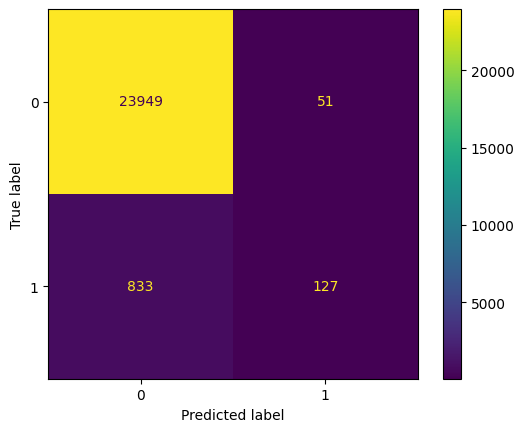

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Análisis de cantidad de muestras por clase

Label 1: 4800 samples
Label 2: 4800 samples
Label 3: 4800 samples
Label 4: 4800 samples
Label 5: 4800 samples
Label 6: 4800 samples
Label 7: 4800 samples
Label 8: 4800 samples
Label 9: 4800 samples
Label 10: 4800 samples
Label 11: 4800 samples
Label 12: 4800 samples
Label 13: 4800 samples
Label 14: 4800 samples
Label 15: 4800 samples
Label 16: 4800 samples
Label 17: 4800 samples
Label 18: 4800 samples
Label 19: 4800 samples
Label 20: 4800 samples
Label 21: 4800 samples
Label 22: 4800 samples
Label 23: 4800 samples
Label 24: 4800 samples
Label 25: 4800 samples
Label 26: 4800 samples


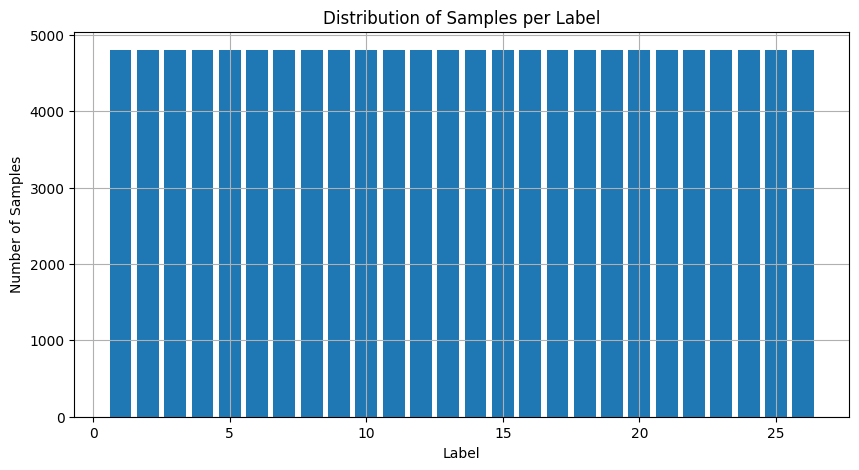

In [ ]:
unique_labels, counts = np.unique(y, return_counts=True) # Guardando los labels únicos y el conteo de muestras por label

# Display count for each label
for label, count in zip(unique_labels, counts): # Emparejando listas label, conteo
    print(f"Label {label}: {count} samples")

plt.figure(figsize=(10, 5))
plt.bar(unique_labels, counts)
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples per Label")
plt.grid(True)
plt.show()

Como se dividió la muestra en 20/80 esto quiere decir que de las 4800 muestras el testeo se hizo en 960 datos

FP + FN = 833 + 127 = 960

## Curva de Precision/Recall Trade-off

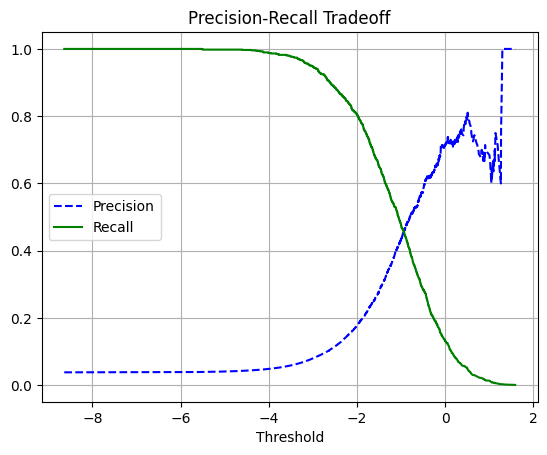

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure()
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

x representa el umbral de decisión, encima del cual se predicen los valores

Relación inversa entre:
* TP / (TP + FP) - ¿cuántas veces acertó?
* TP / (TP + FN) - ¿cuántas detectó correctamente del conjunto de valores correctos?

**Entre menos se le asigne a todo positivo mayor en la precisión.**

* Recall	¿Cuántos positivos reales detectó el modelo? (sensibilidad)
* Precision	¿Cuántas veces el modelo acertó al predecir “positivo”?

* Recall alto: el modelo detecta casi todos los positivos, pero con muchos falsos positivos → baja precisión.

* Precisión alta: el modelo predice solo cuando está muy seguro, pero deja pasar positivos reales → bajo recall.

* El tradeoff es natural y depende de la aplicación.

## Curva de Recall vs Fall Out

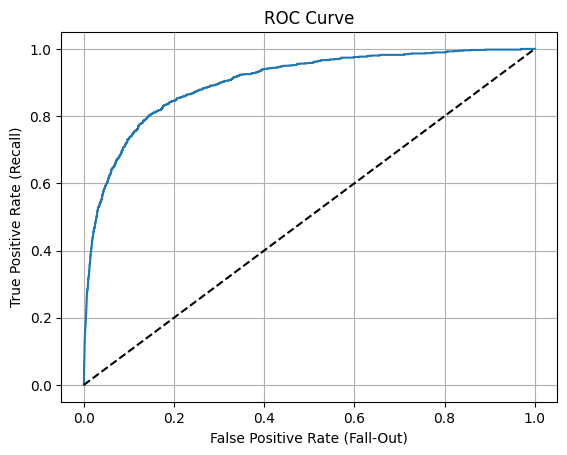

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()

plt.show()

Eje X: Tasa de falsos positivos (FPR)

Eje Y: Tasa de verdaderos positivos (Recall o TPR)

Representa el rendimiento del modelo a medida que se ajusta el umbral de decisión.

Por encima de la diagonal (modelo aleatorio o sin valor predictivo)

# **Modelo Multietiqueta (Multilabel Classification)**

In [ ]:
from sklearn.metrics import (
    classification_report
)

In [ ]:
y = np.array([emnist[i][1] for i in range(len(emnist))]) # Regenerando y para iniciar el modelo multilabel

y_sorted = np.sort(y)
print(y_sorted)

[ 1  1  1 ... 26 26 26]


In [ ]:
# scikit-learn necesita que los labels comiencen desde 0
y -= 1 # Sin 0 los índices del classification report no coinciden con los nombres reales.

In [ ]:
# Entrenamiento 80/20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
clfl = SGDClassifier(random_state=42)
clfl.fit(X_train, y_train)

SGDClassifier(random_state=42)

Evaluando el modelo

In [ ]:
score = clfl.score(X_test, y_test)
y_pred = clfl.predict(X_test)
print("Test Accuracy:", score)

Test Accuracy: 0.6706730769230769


## Matriz de Confusión

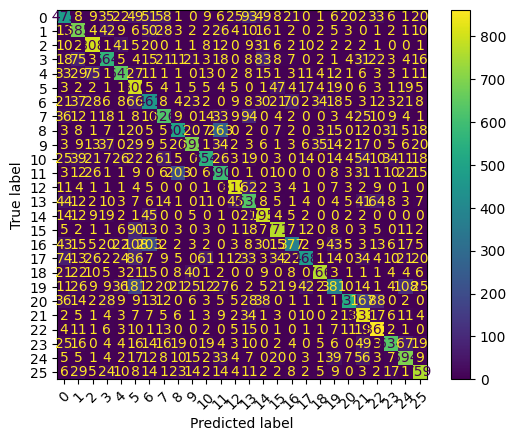

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(xticks_rotation=45)

In [ ]:
target_label = [chr(i) for i in range(ord('A'), ord('Z')+1)]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_label))


Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.47      0.49      1008
           B       0.62      0.74      0.67       927
           C       0.76      0.83      0.79       977
           D       0.66      0.60      0.63       947
           E       0.73      0.70      0.72       919
           F       0.50      0.83      0.62       970
           G       0.46      0.51      0.48       908
           H       0.68      0.67      0.67       933
           I       0.58      0.54      0.56       938
           J       0.79      0.71      0.75       975
           K       0.74      0.57      0.64       972
           L       0.53      0.62      0.57       958
           M       0.85      0.87      0.86       941
           N       0.56      0.68      0.61       941
           O       0.70      0.85      0.77       939
           P       0.77      0.80      0.78       969
           Q       0.67      0.39      0.50       961
   

Usa classification_report de sklearn.metrics para mostrar:

* Precision

* Recall

* F1-score

* Soporte (n° de muestras por clase)

🔹 target_names=target_label:
Asocia cada clase numérica (0–25) con su letra correspondiente (A–Z) en el reporte.

In [ ]:
macro_precision = precision_score(y_test, y_pred, average="macro")
print("Macro Precision Score:", macro_precision)

Macro Precision Score: 0.6823040320447109
